In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
# Read the csv file into a pandas DataFrame
uber = pd.read_csv('uberPricesNew.csv')

In [52]:
uber["day"].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [57]:
#uber = uber.loc[(uber["day"] == "Tuesday")]
uber = uber.loc[(uber["day"] == "Tuesday") | 
((uber["day"] == "Monday") & (uber["time"].isin(["00:00", "01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00","09:00","10:00","11:00"]))) | 
((uber["day"] == "Wednesday") & (uber["time"].isin(["07:00","08:00","09:00"]))) |
((uber["day"] == "Friday") & (uber["time"].isin(["12:00","13:00","14:00","22:00","23:00"]))) |
((uber["day"] == "Thursday") & (uber["time"] == "23:00"))]
#uber = uber.loc[(uber["day"] == "Friday") | (uber["day"] == "Thursday") | (uber["day"] == "Wednesday") |   "12:00","13:00","14:00","22:00","23:00"
#                (uber["day"] == "Monday") | (uber["day"] == "Tuesday")]
uber.shape

(68094, 14)

In [58]:
# Read the csv file into a pandas DataFrame

uber["avg_estimate"] = (uber["high_estimate"] + uber["low_estimate"]) / 2
uber = uber[["place","dist","display_name","avg_estimate","time"]]
uber.head()

,place,dist,display_name,avg_estimate,time
0,Centennial Park,1.37,UberPool,7.5,23:00
1,Centennial Park,1.37,UberX,8.0,23:00
2,Centennial Park,1.37,UberXL,10.5,23:00
3,Centennial Park,1.37,Select,13.0,23:00
4,Centennial Park,1.37,Black,17.0,23:00


In [76]:
lyft = pd.read_csv('lyftPricesNew.csv')
lyft = lyft.loc[(lyft["day"] == "Tuesday") | 
((lyft["day"] == "Monday") & (lyft["time"].isin(["00:00", "01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00","09:00","10:00","11:00"]))) | 
((lyft["day"] == "Wednesday") & (lyft["time"].isin(["07:00","08:00","09:00"]))) |
((lyft["day"] == "Friday") & (lyft["time"].isin(["12:00","13:00","14:00","22:00","23:00"]))) |
((lyft["day"] == "Thursday") & (lyft["time"] == "23:00"))]
lyft["avg_estimate"] = (lyft["high_estimate"] + lyft["low_estimate"]) / 2
lyft= lyft[["place","dist","display_name","avg_estimate","time"]]
lyft.head()

,place,dist,display_name,avg_estimate,time
0,Centennial Park,1.71,Shared,3.0,23:00
1,Centennial Park,1.71,Lyft,7.0,23:00
2,Centennial Park,1.71,Lyft XL,10.5,23:00
3,Centennial Park,1.71,Lux,13.5,23:00
4,Centennial Park,1.71,Lux Black,16.5,23:00


## Linear Regression with seperate Uber and Lyft Files

In [59]:
uber = pd.get_dummies(uber)

In [60]:
uber.columns

Index(['dist', 'avg_estimate', 'place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'display_name_Black', 'display_name_Black SUV', 'display_

In [61]:
X = uber[['dist', 'place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'display_name_Black', 'display_name_Black SUV', 'display_name_Select',
       'display_name_UberPool', 'display_name_UberX', 'display_name_UberXL',
       'time_00:00', 'time_01:00', 'time_02:00', 'time_03:00', 'time_04:00',
       'time_05:00', 'time_06:00', 'time_07:00', 'time_08:00', 'time_09:00',
       'time_10:00', 'time_11:00', 'time_12:00', 'time_13:00', 'time_14:00',
       'time_15:00', 'time_16:00', 'time_17:00', 'time_18:00', 'time_19:00',
       'time_20:00', 'time_21:00', 'time_22:00', 'time_23:00']]

In [62]:
uber.shape

(68094, 71)

In [63]:
y = uber["avg_estimate"].values.reshape(-1, 1)
print(X.shape, y.shape)

(68094, 70) (68094, 1)


In [77]:
lyft = pd.get_dummies(lyft)

In [78]:
lyft.columns

Index(['dist', 'avg_estimate', 'place_Atlanta High Museum', 'place_Bartow',
       'place_Buckhead Bars', 'place_Butts', 'place_Centennial Park',
       'place_Cherokee', 'place_Clayton', 'place_Cobb', 'place_Coweta',
       'place_Dekalb', 'place_Douglas', 'place_Edgewood Bars',
       'place_Emory University', 'place_Fayette', 'place_Forsyth',
       'place_Fox Theater', 'place_Fulton', 'place_Georgia State University',
       'place_Gwinett', 'place_Hall', 'place_Hartsfield Jackson Airport',
       'place_Henry', 'place_Inman Park', 'place_Lenox Square Mall',
       'place_Mercedes Benz Stadium', 'place_Newton', 'place_Paulding',
       'place_Piedmont Park', 'place_Rockdale', 'place_Shops at Buckhead',
       'place_Six Flags', 'place_Spalding', 'place_Spelman College',
       'place_Statefarm Arena', 'place_Stone Mountain', 'place_SunTrust Park',
       'place_Virginia Highlands', 'place_Walton', 'place_Zoo Atlanta',
       'display_name_Lux', 'display_name_Lux Black',
       'dis

### Linear regression Uber

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8348965814174851
Testing Score: 0.8330117975389122


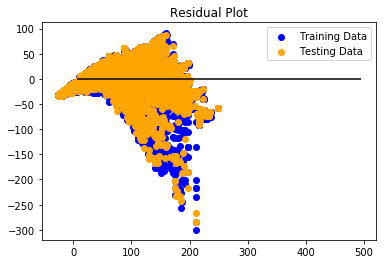

In [67]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 589.2013994362374, R2: 0.8330117975389122


In [ ]:
predictions-y_test

### LassoLars Regression Uber

In [ ]:
from sklearn.linear_model import LassoLars
reg = LassoLars(alpha=0.01)
reg.fit(X_train, y_train)
training_score1 = reg.score(X_train, y_train)
testing_score1 = reg.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score1}")
print(f"Testing Score: {testing_score1}")

### SVR Regression Uber

In [ ]:
# Did not work
hey
from sklearn.svm import SVR

clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X, y) 
training_score2 = clf.score(X_train, y_train)
testing_score2 = clf.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score2}")
print(f"Testing Score: {testing_score2}")

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr1 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr1.fit(X, y)
training_score3 = regr1.score(X_train, y_train)
testing_score3 = regr1.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr2 = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
regr2.fit(X, y)
training_score3 = regr2.score(X_train, y_train)
testing_score3 = regr2.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr3 = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=200)
regr3.fit(X, y.ravel())
training3_score3 = regr3.score(X_train, y_train.ravel())
testing3_score3 = regr3.score(X_test, y_test.ravel())

### END SOLUTION 

print(f"Training Score: {training3_score3}")
print(f"Testing Score: {testing3_score3}")

predictionsrf3 = regr3.predict(X_test)
MSE3 = mean_squared_error(y_test.ravel(), predictionsrf3)
r23 = regr3.score(X_test, y_test.ravel())
print(f"MSE: {MSE3}, R2: {r23}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=200)
regr.fit(X, y.ravel())
training_score3 = regr.score(X_train, y_train)
testing_score3 = regr.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

In [69]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=11, random_state=0, n_estimators=200)
regr.fit(X, y.ravel())
training_score3 = regr.score(X_train, y_train.ravel())
testing_score3 = regr.score(X_test, y_test.ravel())

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

Training Score: 0.973823349929246
Testing Score: 0.9764373706151016


In [70]:
predictionsrf = regr.predict(X_test)
MSE = mean_squared_error(y_test.ravel(), predictionsrf)
r2 = regr.score(X_test, y_test.ravel())

print(f"MSE: {MSE}, R2: {r2}")

MSE: 83.13841339309366, R2: 0.9764373706151016


In [71]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=15, random_state=0, n_estimators=500)
regr.fit(X, y.ravel())
training_score3 = regr.score(X_train, y_train.ravel())
testing_score3 = regr.score(X_test, y_test.ravel())

### END SOLUTION 

print(f"Training Score: {training_score3}")
print(f"Testing Score: {testing_score3}")

Training Score: 0.9801091900314491
Testing Score: 0.9822999402316176


In [72]:
predictionsrf = regr.predict(X_test)
MSE = mean_squared_error(y_test.ravel(), predictionsrf)
r2 = regr.score(X_test, y_test.ravel())

print(f"MSE: {MSE}, R2: {r2}")

MSE: 62.45291482831627, R2: 0.9822999402316176


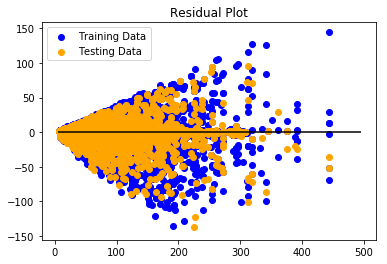

In [73]:
plt.scatter(regr.predict(X_train), regr.predict(X_train) - y_train.ravel(), c="blue", label="Training Data")
plt.scatter(regr.predict(X_test), regr.predict(X_test) - y_test.ravel(), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.ravel().min(), xmax=y_test.ravel().max())
plt.title("Residual Plot")
plt.show()

In [ ]:
regr.get_params()

In [ ]:
importances = regr.feature_importances_
importances

In [ ]:
# We can sort the features by their importance
sorted(zip(regr.feature_importances_, X.columns), reverse=True)

In [ ]:
predictionsrf.shape

In [ ]:
y_test

In [ ]:
y_test.ravel().shape

In [ ]:
predictionsrf - y_test.ravel()

In [ ]:
pr = regr.predict([[1.32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
pr

In [ ]:
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
xpr = uber.loc[(uber["dist"] == 1.32) & (uber["place_Atlanta High Museum"] == 1) &
                (uber["display_name_UberX"] == 1) & (uber["time_08:00"] == 1)]
xpr


In [74]:
uber_all1 = pd.read_csv('uberPricesNew.csv')
uber_all1 = uber_all1.loc[(uber_all1["day"] == "Thursday") | (uber_all1["day"] == "Wednesday") |
                (uber_all1["day"] == "Monday") | (uber_all1["day"] == "Tuesday")]
uber_all1["avg_estimate"] = (uber_all1["high_estimate"] + uber_all1["low_estimate"]) / 2
uber_all1 = uber_all1[["place","dist","display_name","avg_estimate","time","autotime","day"]]
uber_all1.head()

,place,dist,display_name,avg_estimate,time,autotime,day
0,Centennial Park,1.37,UberPool,7.5,23:00,23:11,Thursday
1,Centennial Park,1.37,UberX,8.0,23:00,23:11,Thursday
2,Centennial Park,1.37,UberXL,10.5,23:00,23:11,Thursday
3,Centennial Park,1.37,Select,13.0,23:00,23:11,Thursday
4,Centennial Park,1.37,Black,17.0,23:00,23:11,Thursday


In [75]:
xpr1 = uber_all1.loc[(uber_all1["place"] == "Virginia Highlands") &
                (uber_all1["display_name"] == "UberX") & (uber_all1["time"] == "17:00")]
xpr1

,place,dist,display_name,avg_estimate,time,autotime,day
177193,Virginia Highlands,1.02,UberX,9.5,17:00,17:04,Tuesday
177427,Virginia Highlands,1.02,UberX,12.5,17:00,17:09,Tuesday
177661,Virginia Highlands,1.02,UberX,11.5,17:00,17:13,Tuesday
177895,Virginia Highlands,1.02,UberX,16.5,17:00,17:18,Tuesday
178129,Virginia Highlands,1.02,UberX,17.5,17:00,17:23,Tuesday
178363,Virginia Highlands,1.02,UberX,17.0,17:00,17:28,Tuesday
178597,Virginia Highlands,1.02,UberX,17.0,17:00,17:34,Tuesday
178831,Virginia Highlands,1.02,UberX,15.0,17:00,17:39,Tuesday
179065,Virginia Highlands,1.02,UberX,14.0,17:00,17:44,Tuesday
179299,Virginia Highlands,1.02,UberX,15.0,17:00,17:49,Tuesday


In [ ]:
pd.DataFrame({"Predicted": predictionsrf, "Actual": y_test.ravel(), "Error": predictionsrf - y_test.ravel()})[["Predicted", "Actual", "Error"]]